<a href="https://colab.research.google.com/github/CD-AC/Master_AI/blob/main/AnalisisDeforestacionAmazonas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar Complementos

In [1]:
!pip install opencv-python numpy matplotlib

# Importar Librerias

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image

# Importar Imagenes

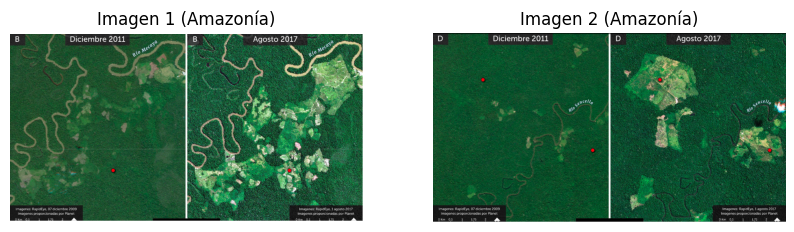

In [6]:
image1_url = "https://imgs.mongabay.com/wp-content/uploads/sites/25/2018/02/09143644/MAAP-Colombia-2.png"
image2_url = "https://imgs.mongabay.com/wp-content/uploads/sites/25/2018/02/09143526/MAAP-Colombia-4.png"

def load_image_from_url(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    image = np.array(image)

    if image.shape[-1] == 4:
        image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)

    return image

image1 = load_image_from_url(image1_url)
image2 = load_image_from_url(image2_url)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.axis("off")
plt.title("Imagen 1 (Amazonía)")

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.axis("off")
plt.title("Imagen 2 (Amazonía)")

plt.show()

# Procesamiento Escala de Grises y Ecualización de Histograma


In [7]:
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    equalized = cv2.equalizeHist(gray)
    return equalized

In [8]:
preprocessed1 = preprocess_image(image1)
preprocessed2 = preprocess_image(image2)

def segment_deforestation(image):
    _, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = np.ones((3,3), np.uint8)
    refined = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel, iterations=2)
    return refined

# Segmentación de Imagenes

In [9]:
segmented1 = segment_deforestation(preprocessed1)
segmented2 = segment_deforestation(preprocessed2)

def calculate_deforested_area(segmented_image):
    deforested_pixels = np.sum(segmented_image == 255)
    km2_per_pixel = (20/51)**2
    deforested_area_km2 = deforested_pixels * km2_per_pixel
    return deforested_area_km2

# Calcualo de Km2 de Deforestación

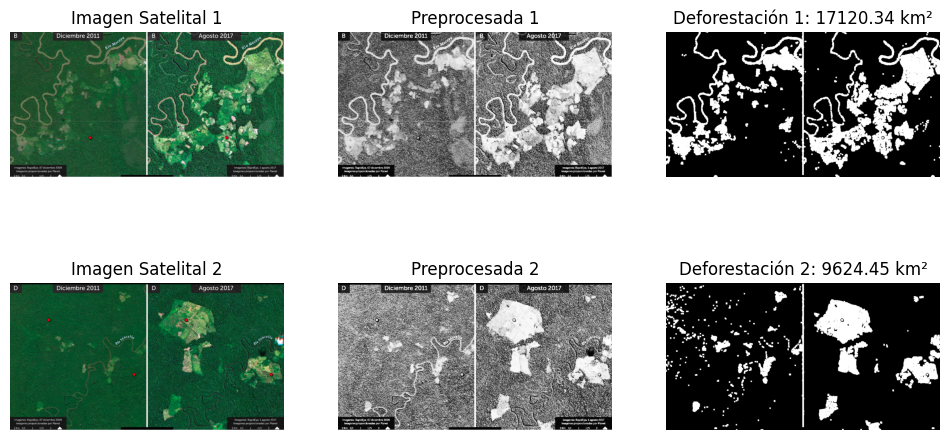

Área deforestada en la imagen 1: 17120.34 km²
Área deforestada en la imagen 2: 9624.45 km²
Diferencia de deforestación: 7495.89 km²


In [10]:
area1 = calculate_deforested_area(segmented1)
area2 = calculate_deforested_area(segmented2)

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(image1)
plt.axis("off")
plt.title("Imagen Satelital 1")

plt.subplot(2, 3, 2)
plt.imshow(preprocessed1, cmap="gray")
plt.axis("off")
plt.title("Preprocesada 1")

plt.subplot(2, 3, 3)
plt.imshow(segmented1, cmap="gray")
plt.axis("off")
plt.title(f"Deforestación 1: {area1:.2f} km²")

plt.subplot(2, 3, 4)
plt.imshow(image2)
plt.axis("off")
plt.title("Imagen Satelital 2")

plt.subplot(2, 3, 5)
plt.imshow(preprocessed2, cmap="gray")
plt.axis("off")
plt.title("Preprocesada 2")

plt.subplot(2, 3, 6)
plt.imshow(segmented2, cmap="gray")
plt.axis("off")
plt.title(f"Deforestación 2: {area2:.2f} km²")

plt.show()

# Mostrar comparación de áreas deforestadas
print(f"Área deforestada en la imagen 1: {area1:.2f} km²")
print(f"Área deforestada en la imagen 2: {area2:.2f} km²")
print(f"Diferencia de deforestación: {abs(area2 - area1):.2f} km²")